In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
import graspologic as gl
from pathlib import Path
from celegans_connectome_analysis.get_nx import get_adult_c_elegans_nx

/Users/thomasathey/Documents/shavit-lab/celegans/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
G = get_adult_c_elegans_nx()

/Users/thomasathey/Documents/shavit-lab/celegans/celegans_connectome_analysis/celegans_connectome_analysis/get_nx.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["neuron type"] = df["neuron type"].fillna(method='ffill')


In [3]:
transmitters = {'ADFL':'ACh',
 'ADFR':'ACh',
 'ADLL':'glut',
 'ADLR':'glut',
 'AFDL':'glut',
 'AFDR':'glut',
 'ALML':'glut',
 'ALMR':'glut',
 'ALNL':'ACh',
 'ALNR':'ACh',
 'AQR':'glut',
 'ASEL':'glut',
 'ASER':'glut',
 'ASGL':'glut',
 'ASGR':'glut',
 'ASHL':'glut',
 'ASHR':'glut',
 'ASIL':'DAF-28',
 'ASIR':'DAF-28',
 'ASJL':'NLP-3',
 'ASJR':'NLP-3',
 'ASKL':'glut',
 'ASKR':'glut',
 'AUAL':'glut',
 'AUAR':'glut',
 'AVM':'glut',
 'AWAL':'na',
 'AWAR': 'na',
 'AWBL':'ACh',
 'AWBR':'ACh',
 'AWCL':'glut',
 'AWCR':'glut',
 'BAGL':'glut',
 'BAGR':'glut',
 'DVA':'ACh',
 'FLPL':'glut',
 'FLPR':'glut',
 'IL2DL':'ACh',
 'IL2DR':'ACh',
 'IL2L':'ACh',
 'IL2R':'ACh',
 'IL2VL':'ACh',
 'IL2VR':'ACh',
 'OLLL': 'glut',
 'OLLR': 'glut',
 'OLQDL': 'glut',
 'OLQDR': 'glut',
 'OLQVL': 'glut',
 'OLQVR': 'glut',
 'PLNL': 'ACh',
 'PLNR': 'ACh',
 'SAADL': 'ACh',
 'SAADR': 'ACh',
 'SAAVL': 'ACh',
 'SAAVR': 'ACh',
 'SDQL': 'ACh',
 'SDQR': 'ACh',
 'URBL': 'ACh',
 'URBR': 'ACh',
 'URXL': 'ACh',
 'URXR': 'ACh',
 'URYDL': 'glut',
 'URYDR':'glut',
 'URYVL': 'glut',
 'URYVR': 'glut',}


In [4]:
sensories = []

for n in G.nodes:
    if G.nodes[n]["neuron type"] == "Sens.":
        G.nodes[n]["transmitter"] = transmitters[n]


In [5]:
# remove all nodes unless the neuron type is Sens. or Inter.
nodes_to_remove = []
for n in G.nodes:
    if G.nodes[n]["neuron type"] not in ["Sens.", "Inter."]:
        nodes_to_remove.append(n)
G.remove_nodes_from(nodes_to_remove)

transmitter = "ACh"

# remove all edges that are not from Sens. to Inter.
edges_to_remove = []
for e in G.edges:
    if False:#"transmitter" in G.nodes[e[0]] and G.nodes[e[0]]["transmitter"] != transmitter:
        edges_to_remove.append(e)
    elif G.nodes[e[0]]["neuron type"] != "Sens." or G.nodes[e[1]]["neuron type"] != "Inter.":
        edges_to_remove.append(e)
G.remove_edges_from(edges_to_remove)

In [6]:
# remove all nodes that have neuron type equal to Muscle\
muscle_nodes = [n for n in G.nodes if G.nodes[n]["neuron type"] == "Muscle"]
G.remove_nodes_from(muscle_nodes)

A = nx.adjacency_matrix(G).todense()
neuron_types = [G.nodes[n]["neuron type"] for n in G.nodes]

<Axes: title={'center': 'Binarized ACh Sens->Inter Connectome of Adult Hermaphrodite C. elegans Head (Witvliet et al. 2021)'}>

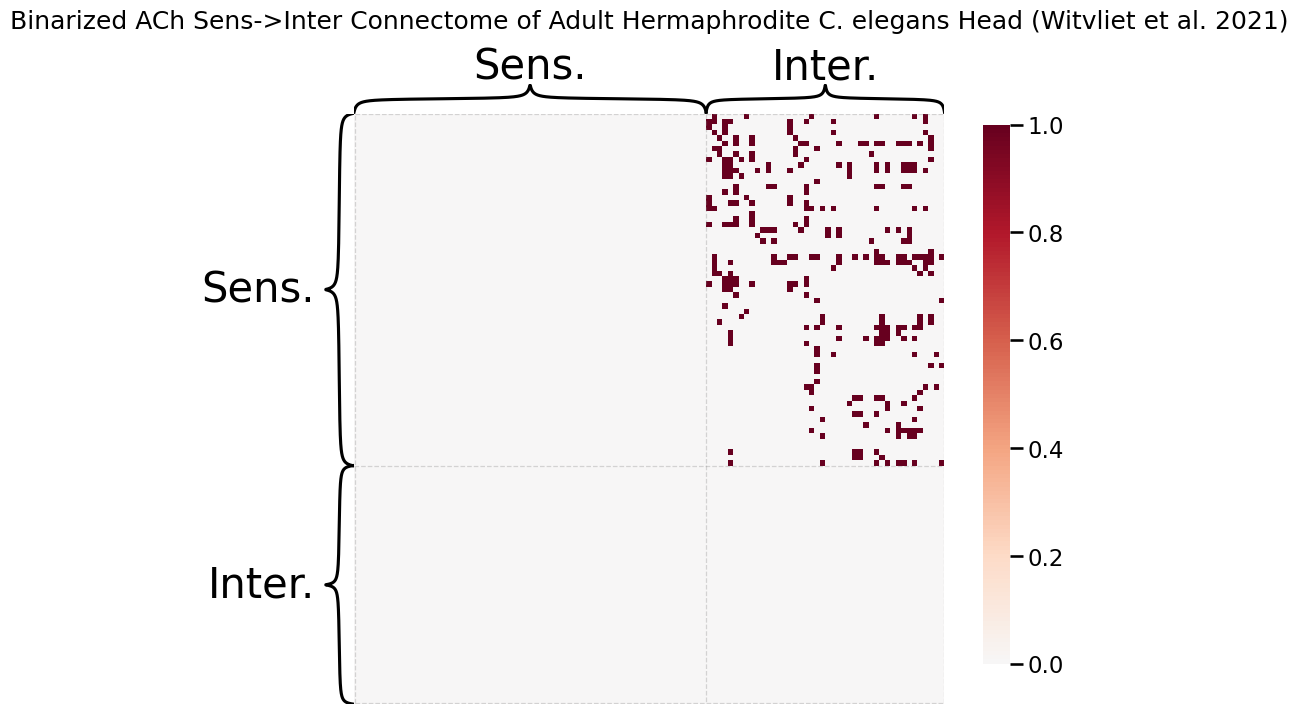

In [7]:
# use gl.plot.heatmap to plot the adjacency matrix and make the figure size 20x20
#fig, ax = plt.subplots(figsize=(20, 20))


title = "Binarized ACh Sens->Inter Connectome of Adult Hermaphrodite C. elegans Head (Witvliet et al. 2021)"

gl.plot.heatmap(A>0, inner_hier_labels=neuron_types, sort_nodes=False, title=title)#, ax=ax)

